In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.iloc[:, [3, 4]].values
print(df.shape)
df[:5]

(200, 2)


array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

<Axes: >

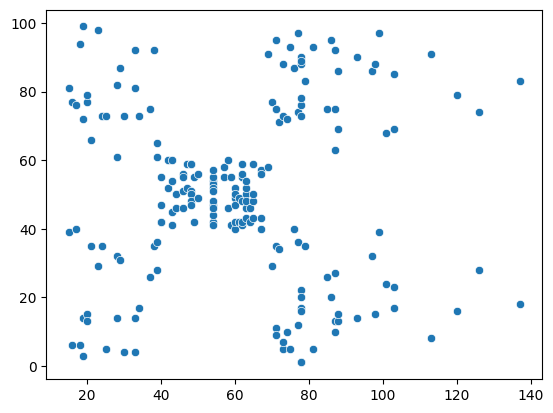

In [4]:
sns.scatterplot(x=df[:, 0], y=df[:, 1])

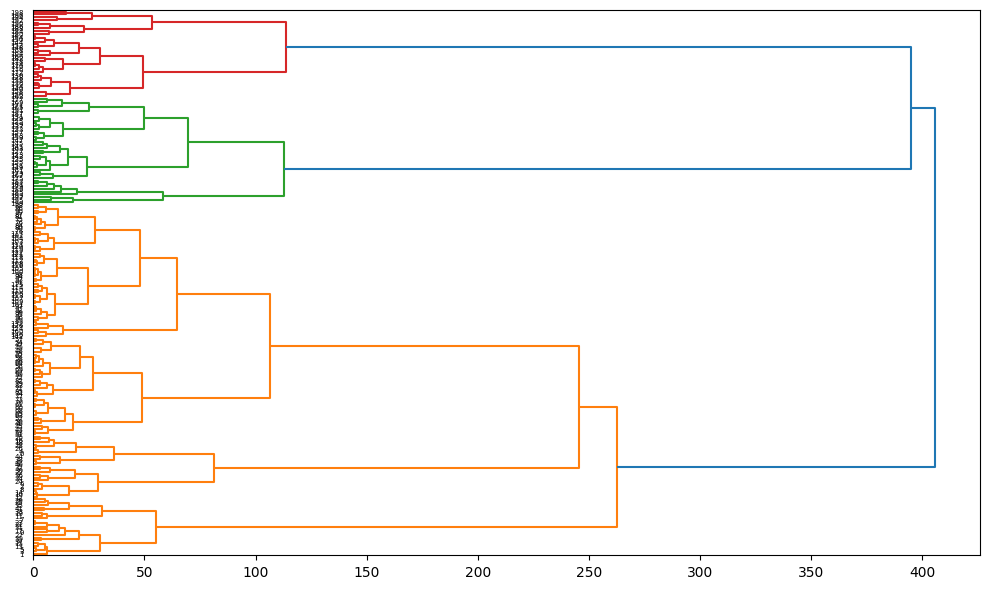

In [25]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), orientation = 'right')
plt.tight_layout()
plt.show()

# there are 2 techniques in hc
1. Agglomerative
2. Divisive

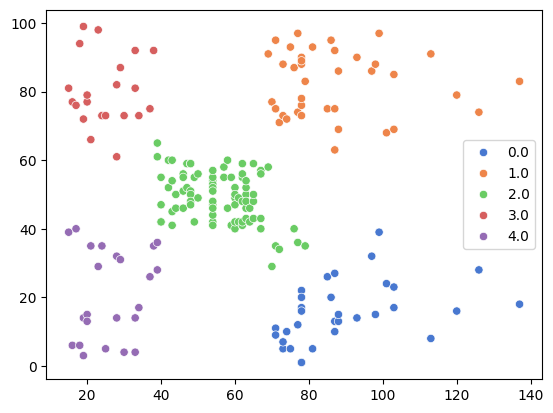

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sch', AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=5))
])

pipe.fit(df)

labels = pipe.named_steps['sch'].labels_
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels.astype(float), palette='muted');